In [ ]:
# 마찬가지로 필요한 library 모두 다운받기
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')
from sklearn.metrics import confusion_matrix
import tensorflow as tf

import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Convolution2D, MaxPooling2D, Flatten , Activation
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import optimizers

In [ ]:
from tensorflow.keras.datasets import mnist #MNIST로부터 data 불러오기
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# x_train에서 50000개까지를 training set,나머지 60000까지를 valid set으로 한다.
X_train=x_train[0:50000] / 255 #모든 값을 255로 나누어 0과 1사이의 값으로 만들 것이다.
Y_train=keras.utils.to_categorical(y_train[0:50000],10) # one-hot encoding

X_val=x_train[50000:60000] / 255
Y_val=keras.utils.to_categorical(y_train[50000:60000],10)

X_test=x_test / 255
Y_test=keras.utils.to_categorical(y_test,10)

del x_train, y_train, x_test, y_test

X_train=np.reshape(X_train, (X_train.shape[0],28,28,1))
X_val=np.reshape(X_val, (X_val.shape[0],28,28,1))
X_test=np.reshape(X_test, (X_test.shape[0],28,28,1))


11490434/11490434 [==============================] - 0s 0us/step


<ipython-input-6-60d65843ad2f>:6: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.title('true label: '+np.str(np.argmax(Y_train,axis=1)[i]))


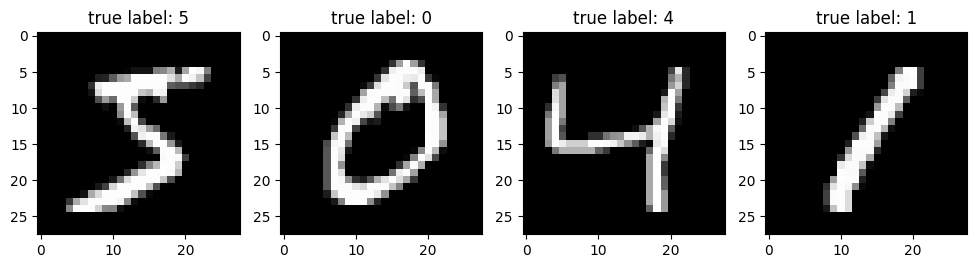

In [ ]:
# 데이터가 잘 읽혔나 확인해보기
plt.figure(figsize=(12,12))
for i in range(0,4):
    plt.subplot(1,4,(i+1))
    plt.imshow((X_train[i,:,:,0]),cmap="gray")
    plt.title('true label: '+np.str(np.argmax(Y_train,axis=1)[i]))
    #plt.axis('off')

In [ ]:
# fcNN을 사용하기 위해 데이터를 1차원 벡터 형태로 펼쳐야 함.

X_train_flat = X_train.reshape([X_train.shape[0], 784])
X_val_flat = X_val.reshape([X_val.shape[0], 784])
X_test_flat = X_test.reshape([X_test.shape[0], 784])


In [ ]:
# 각각 100, 50개의 neuron으로 이루어진 hidden layer 2개를 가지는 fcNN을 만들 것.
model = Sequential()

model.add(Dense(100, batch_input_shape=(None, 784))) #100개의 neuron을 가지는 첫 번째 layer
model.add(Activation('sigmoid'))
model.add(Dense(50)) # 50개의 neuron을 가지는 두 번째 layer
model.add(Activation('sigmoid'))
model.add(Dense(10)) # output layer는 10 가지의 결과값을 가짐
model.add(Activation('softmax')) #확률들의 합을 1로 맞추기 위해 softmax함수를 사용

# compile model and intitialize weights
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
# 마찬가지로 모델 트레이닝
history=model.fit(X_train_flat, Y_train,
                  batch_size=128,
                  epochs=10,
                  verbose=2,
                  validation_data=(X_val_flat, Y_val)
                 )

Epoch 1/10
391/391 - 3s - loss: 1.0003 - accuracy: 0.7759 - val_loss: 0.3910 - val_accuracy: 0.9109 - 3s/epoch - 8ms/step
Epoch 2/10
391/391 - 1s - loss: 0.3311 - accuracy: 0.9130 - val_loss: 0.2523 - val_accuracy: 0.9309 - 1s/epoch - 4ms/step
Epoch 3/10
391/391 - 1s - loss: 0.2411 - accuracy: 0.9318 - val_loss: 0.2023 - val_accuracy: 0.9432 - 1s/epoch - 3ms/step
Epoch 4/10
391/391 - 1s - loss: 0.1961 - accuracy: 0.9440 - val_loss: 0.1741 - val_accuracy: 0.9515 - 1s/epoch - 3ms/step
Epoch 5/10
391/391 - 1s - loss: 0.1656 - accuracy: 0.9520 - val_loss: 0.1533 - val_accuracy: 0.9571 - 1s/epoch - 4ms/step
Epoch 6/10
391/391 - 1s - loss: 0.1422 - accuracy: 0.9584 - val_loss: 0.1414 - val_accuracy: 0.9598 - 1s/epoch - 3ms/step
Epoch 7/10
391/391 - 1s - loss: 0.1234 - accuracy: 0.9649 - val_loss: 0.1250 - val_accuracy: 0.9637 - 1s/epoch - 4ms/step
Epoch 8/10
391/391 - 2s - loss: 0.1087 - accuracy: 0.9689 - val_loss: 0.1153 - val_accuracy: 0.9658 - 2s/epoch - 6ms/step
Epoch 9/10
391/391 - 1s 

In the next cell we plot the accuray and loss of the train and validation vs the number of train eprochs to see how the development

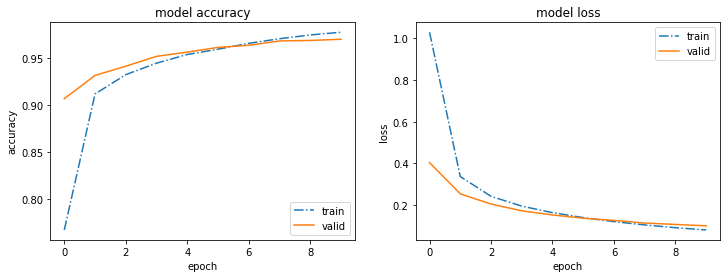

In [ ]:
# training 과정이 진행됨에 따라 accuracy와 loss의 변화를 시각적으로 확인해보자.
plt.figure(figsize=(12,4))
plt.subplot(1,2,(1))
plt.plot(history.history['accuracy'],linestyle='-.')
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='lower right')
plt.subplot(1,2,(2))
plt.plot(history.history['loss'],linestyle='-.')
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper right')

In [ ]:
pred=model.predict(X_test_flat) #이제, test data를 이용해 모델의 정확도를 확인해보자.
accuracy = np.sum(np.argmax(Y_test,axis=1)==np.argmax(pred,axis=1))/len(pred)
print("예측 정확도 = " , accuracy)

313/313 [==============================] - 0s 1ms/step
예측 정확도 =  0.9678
